In [109]:
import pygal
import numpy as np
import pandas as pd
import os
from scipy.stats import ks_2samp
from scipy.stats import chisquare


%matplotlib inline

# PRACTICA DE Outliers

In [87]:
df = pd.read_csv("csv/churn.csv")

In [88]:
len(df.columns)

21

In [89]:
df.shape

(3333, 21)

In [90]:
ls_cont = ["account length", "number vmail messages", "total day minutes", "total day calls", "total day charge",
           "total eve minutes", "total eve calls", "total eve charge", "total night minutes", "total night calls",
           "total night charge", "total intl minutes", "total intl calls", "total intl charge", 
           "customer service calls"]

In [91]:
df["account length"].describe()

count    3333.000000
mean      101.064806
std        39.822106
min         1.000000
25%        74.000000
50%       101.000000
75%       127.000000
max       243.000000
Name: account length, dtype: float64

## Definicion de funcion para IQR

In [92]:
def iqr(df,variable):
    desc = df[variable].describe()
    iqr_value= desc["75%"]- desc["25%"]
    bandaIzq = desc["25%"] - (1.5*iqr_value)
    bandaDer = desc["75%"] + (1.5*iqr_value)
    aux = df.copy()
    return aux[(aux[variable]>bandaIzq) & (aux[variable]<bandaDer)]

In [93]:
iqr(df,"account length")

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [36]:
df["account length"].describe(percentiles=[0.01,0.99])

count    3333.000000
mean      101.064806
std        39.822106
min         1.000000
1%         12.320000
50%       101.000000
99%       195.000000
max       243.000000
Name: account length, dtype: float64

## Definicion de funcion para percentiles

In [41]:
def percentiles(df,variable,percent):
    desc = df[variable].describe(percentiles=[0.01,0.99])
    aux = df.copy()
    return aux[(aux[variable]>desc["1%"]) & (aux[variable]<desc["99%"])]
    

In [42]:
percentiles(df,"account length",[0.01,0.99])

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


## Definicion de funcion para Media

In [45]:
def media(df,variable,n_sigma):
    media = df[variable].mean()
    sigma = df[variable].std()
    aux = df.copy()
    return aux[(media-n_sigma*sigma <= aux[variable])  & (aux[variable] <= media + n_sigma*sigma )]

In [46]:
media(df,"account length",3)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [100]:
comparacion = pd.DataFrame()
comparacion["nombre"]=ls_cont
comparacion["antes"]=df.shape[0]
ls_iqr=[]
ls_mediana=[]
ls_percentiles=[]
for i in ls_cont:
    ls_iqr.append(iqr(df,i).shape[0])
    ls_mediana.append(media(df,i,3).shape[0])
    ls_percentiles.append(percentiles(df,i,[0.01,0.99]).shape[0])
comparacion["iqr"]=ls_iqr
comparacion["mediana"]=ls_mediana
comparacion["percentiles"]=ls_percentiles
comparacion

,nombre,antes,iqr,mediana,percentiles
0,account length,3333,3315,3326,3264
1,number vmail messages,3333,3330,3330,887
2,total day minutes,3333,3308,3324,3265
3,total day calls,3333,3310,3324,3258
4,total day charge,3333,3308,3324,3265
5,total eve minutes,3333,3309,3324,3265
6,total eve calls,3333,3313,3326,3262
7,total eve charge,3333,3309,3324,3265
8,total night minutes,3333,3303,3322,3265
9,total night calls,3333,3307,3327,3258


In [122]:
comparacion.to_excel('comparacion.xlsx')

In [118]:
def plot_histogram(data, n_bins = 10,url=''):
    freq, bins = np.histogram(data, bins=n_bins)
    hist = pygal.Histogram()
    hist.add('Wide bars', list(zip(freq, bins, bins[1:])))
    return hist.render_to_png(url)

In [120]:
os.mkdir('images')
for i in ls_cont:
    os.mkdir('images/'+i)
    plot_histogram(df[i],url='images/'+i+"/original.png")
    plot_histogram(iqr(df,i)[i],url='images/'+i+"/iqr.png")
    plot_histogram(media(df,i,3)[i],url='images/'+i+"/mediana.png")
    plot_histogram(percentiles(df,i,[0.01,0.99])[i],url='images/'+i+"/percentiles.png")

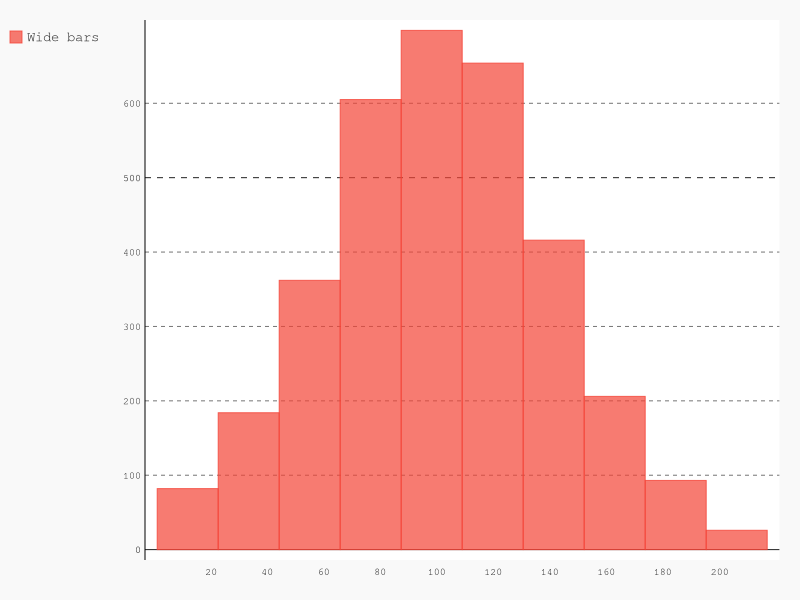

In [106]:
plot_histogram(media(df,"account length",3)["account length"])

In [110]:
os.mkdir('images/account length/mediana.png')